In [1]:
using DifferentialEquations
using Plots

In [2]:
function lorenz!(du,u,p,t)
    x,y,z = u
    σ,ρ,β = p
    
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
end

lorenz! (generic function with 1 method)

In [3]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,1.0)
param=[10.0, 28.0, 8/3]
prob = ODEProblem(lorenz!,u0,tspan,param)
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 28-element Array{Float64,1}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624077544510573
 0.009058075635317072
 0.01695646895607931
 0.0276899566248403
 0.041856345938267966
 0.06024040228733675
 0.08368539694547242
 0.11336497050342806
 0.14862178548871152
 0.18703974465019643
 ⋮
 0.37221152547525677
 0.4201372705729432
 0.4637203592547958
 0.5049460289663918
 0.5570622537949965
 0.6068387449874374
 0.6690203938696947
 0.7276640840586802
 0.798854234447563
 0.8763207996400417
 0.9661628933695969
 1.0
u: 28-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034242593451028745]
 [0.84833098777

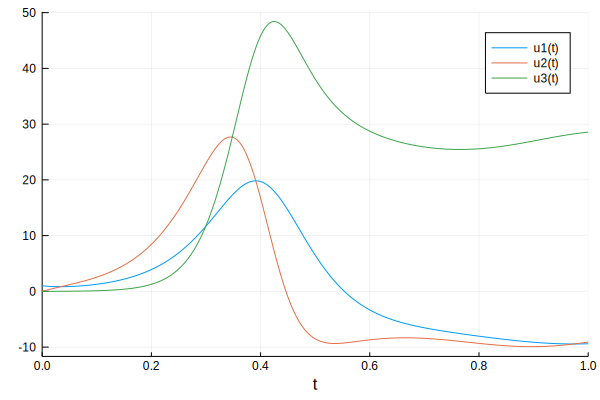

In [4]:
plot(sol)

In [5]:
u0=sol.u[end]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,param)
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1276-element Array{Float64,1}:
   0.0
   0.0643212998173729
   0.12146049375600403
   0.19404894194474215
   0.2741028434949973
   0.3763294534562411
   0.47642405263600096
   0.5862338131757949
   0.6889702298685345
   0.8137510825197651
   0.9188908394845217
   1.0604124384245877
   1.1767908269282734
   ⋮
  99.22024114623642
  99.28138344136775
  99.34996736602218
  99.42505175481546
  99.5169515396852
  99.59466806892196
  99.66916182333932
  99.74301506480711
  99.81291495286696
  99.88460024620092
  99.97127652893508
 100.0
u: 1276-element Array{Array{Float64,1},1}:
 [-9.395403780701917, -9.093416304499454, 28.553652185231734]
 [-8.996304644165681, -8.115195082683018, 28.73842072687945]
 [-8.43238478410594, -7.404436687691967, 28.24645181694211]
 [-7.771691211804133, -7.056393785346572, 27.094715956612436]
 [-7.462783722695311, -7.433832934524049, 25.80792961701246]
 [-7.8842781272262386, -8.68183492781534

In [6]:
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/michael/.julia/packages/Plots/cc8wh/src/backends.jl:363


Plots.PlotlyBackend()

In [7]:
plot(sol,vars=(1,2,3),size=(1000,1000))

<!DOCTYPE html>
 
 
 Plots.jl

In [8]:
z=sol[1,:]+randn(size(sol[1,:]))
plot(z)

<!DOCTYPE html>
 
 
 Plots.jl

In [9]:
using ToeplitzMatrices

In [10]:
de=20
de=de+1
x0=z[1:de]
y=z[de:end]
X=ToeplitzMatrices.Hankel(x0,y)
X=X[1:end-1,:]

20×1256 Array{Float64,2}:
 -10.9447    -8.80059   -8.54192  …   -0.445363    0.178602   -0.634024
  -8.80059   -8.54192   -6.63233       0.178602   -0.634024   -0.765588
  -8.54192   -6.63233   -7.64165      -0.634024   -0.765588   -5.12024
  -6.63233   -7.64165   -7.79638      -0.765588   -5.12024   -12.4817
  -7.64165   -7.79638   -8.09373      -5.12024   -12.4817    -16.8595
  -7.79638   -8.09373  -10.4278   …  -12.4817    -16.8595    -15.9112
  -8.09373  -10.4278    -9.67701     -16.8595    -15.9112     -9.00234
 -10.4278    -9.67701   -8.70881     -15.9112     -9.00234    -2.99441
  -9.67701   -8.70881   -7.75566      -9.00234    -2.99441     0.678916
  -8.70881   -7.75566   -8.50835      -2.99441     0.678916    2.29716
  -7.75566   -8.50835   -7.97459  …    0.678916    2.29716     4.1663
  -8.50835   -7.97459   -9.73924       2.29716     4.1663      4.10921
  -7.97459   -9.73924   -6.9001        4.1663      4.10921     7.4549
  -9.73924   -6.9001    -6.59944       4.10921     7.

In [11]:
plot(z)

<!DOCTYPE html>
 
 
 Plots.jl

In [12]:
plot(X')

<!DOCTYPE html>
 
 
 Plots.jl

In [13]:
function gaussian(x) 
    return exp.(-x.^2)
end

gaussian (generic function with 1 method)

In [14]:
gaussian([5 6 7])

1×3 Array{Float64,2}:
 1.38879e-11  2.31952e-16  5.24289e-22

In [15]:
function tophat(x,p)
    return exp.(-x.^p)
end

tophat (generic function with 1 method)

In [16]:
tophat([5 6 7],[1 2 4])

1×3 Array{Float64,2}:
 0.00673795  2.31952e-16  0.0

In [17]:
	struct BasisFunc
    	funct
    	embed
    	radius
    	centre
    	params
	end

In [18]:
rbf1 = BasisFunc(gaussian,[0, 5, 10],3,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],[])

BasisFunc(gaussian, [0, 5, 10], 3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], Any[])

In [19]:
rbf.funct(rbf.centre)

UndefVarError: UndefVarError: rbf not defined

In [20]:
rbf2 = BasisFunc(tophat,[0, 5],-4.5,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].*4,[4])

BasisFunc(tophat, [0, 5], -4.5, [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44], [4])

In [21]:
rbf[1]=rbf

UndefVarError: UndefVarError: rbf not defined

In [22]:
rbf2.funct(rbf2.centre[rbf2.embed .+ 1]./rbf2.rad,rbf2.param)

ErrorException: type BasisFunc has no field rad

In [23]:
func

UndefVarError: UndefVarError: func not defined

In [24]:
rbfs=[rbf1 rbf2]

1×2 Array{BasisFunc,2}:
 BasisFunc(gaussian, [0, 5, 10], 3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], Any[])  …  BasisFunc(tophat, [0, 5], -4.5, [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44], [4])

In [25]:
rbfs[1]

BasisFunc(gaussian, [0, 5, 10], 3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], Any[])

In [26]:
length(rbfs)

2

In [27]:
isempty(rbfs[1].param)

ErrorException: type BasisFunc has no field param

In [28]:
size(X)

(20, 1256)

In [29]:
ones(1,4)

1×4 Array{Float64,2}:
 1.0  1.0  1.0  1.0

In [30]:
norm

UndefVarError: UndefVarError: norm not defined

In [31]:
X[3,4]

-7.796383941041519

In [32]:
include("Place.jl")

Main.Place

In [33]:
Place.placebo(X,rbfs)

1256×2 Array{Float64,2}:
 9.02447e-34  0.0
 2.60221e-33  0.0
 1.6228e-35   0.0
 3.75194e-36  0.0
 3.12576e-30  0.0
 1.54524e-28  0.0
 5.11828e-31  0.0
 1.80837e-36  0.0
 3.51312e-37  0.0
 3.42664e-32  0.0
 3.70251e-26  0.0
 2.44758e-34  0.0
 2.87637e-35  0.0
 ⋮            
 2.71154e-13  0.0
 2.1895e-16   0.0
 3.95014e-22  0.0
 2.75189e-22  0.0
 4.74599e-32  0.0
 4.44487e-41  0.0
 4.90289e-38  0.0
 1.91996e-22  0.0
 3.79515e-16  0.0
 1.88875e-22  0.0
 1.24951e-29  0.0
 2.82133e-26  0.0

In [34]:
	struct BasisFunc
    	funct
    	embed
    	radius
    	centre
    	params
	end

In [35]:
size(X[(rbfs[1].embed .+ 1)',:])

(1, 3, 1256)

In [36]:
(rbfs[1].embed .+ 1)'

1×3 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  6  11

In [37]:
size(X[[2 3],:])

(1, 2, 1256)

In [38]:
[3,4]

2-element Array{Int64,1}:
 3
 4

In [39]:
[3 4]

1×2 Array{Int64,2}:
 3  4

In [40]:
rbf1

BasisFunc(gaussian, [0, 5, 10], 3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], Any[])

In [41]:
ones(1,100)

1×100 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [42]:
rbf1.embed .+1

3-element Array{Int64,1}:
  1
  6
 11

In [43]:
rbf1.centre[rbf1.embed.+1]'*ones(1,10)

DimensionMismatch: DimensionMismatch("second dimension of A, 1, does not match length of x, 3")

In [44]:
X[rbf3.embed.+1, : ]

UndefVarError: UndefVarError: rbf3 not defined

In [45]:
rbf1.embed.+1

3-element Array{Int64,1}:
  1
  6
 11

In [46]:
rbf1.embed=[0,5,10]

ErrorException: setfield! immutable struct of type BasisFunc cannot be changed

In [47]:
rbf1 = BasisFunc(gaussian,[0, 2, 4],3,X[:,1],[])
rbf2 = BasisFunc(tophat,[0, 1, 2, 3, 4, 5],-4.5,X[:,1001],[4])
rbf3 = BasisFunc(cubic,[0, 5 ,10],3,X[:,42],[])
rbfs=[rbf1, rbf2, rbf3]

UndefVarError: UndefVarError: cubic not defined

In [48]:
	function cubic(x)
		return x.^3
	end

cubic (generic function with 1 method)

In [49]:
rbf1.centre[rbf1.embed.+1]*ones(1,101)

3×101 Array{Float64,2}:
 -10.9447   -10.9447   -10.9447   …  -10.9447   -10.9447   -10.9447
  -8.54192   -8.54192   -8.54192      -8.54192   -8.54192   -8.54192
  -7.64165   -7.64165   -7.64165      -7.64165   -7.64165   -7.64165

In [50]:
options["nbasis"]=500

UndefVarError: UndefVarError: options not defined

In [51]:
options=Dict()

Dict{Any,Any} with 0 entries

In [52]:
options["nbasis"]=500

500

In [53]:
options

Dict{Any,Any} with 1 entry:
  "nbasis" => 500

In [54]:
v=([0 1 2 3], [0, 3], [10, 20, 30])

([0 1 2 3], [0, 3], [10, 20, 30])

In [55]:
Int(floor(503/2))

251

In [56]:
functype=(gaussian, tophat, cubic)

(gaussian, tophat, cubic)

In [57]:
rand(functype)

gaussian (generic function with 1 method)

In [58]:
rand(v,5)

5-element Array{Array{Int64,N} where N,1}:
 [10, 20, 30]
 [10, 20, 30]
 [10, 20, 30]
 [10, 20, 30]
 [0, 3]

In [61]:
make_alias_table([0.2, 0.5, 0.3])

UndefVarError: UndefVarError: make_alias_table not defined

In [60]:
using StatsBase

In [62]:
r = StatsBase.sample(1:100, (1:100).^(10),10000)


MethodError: MethodError: no method matching sample(::UnitRange{Int64}, ::Array{Int64,1}, ::Int64)
Closest candidates are:
  sample(!Matched::Random.AbstractRNG, ::AbstractArray{T,N} where N, ::Integer; replace, ordered) where T at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:373
  sample(::AbstractArray, !Matched::AbstractWeights, ::Integer; replace, ordered) at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:788
  sample(!Matched::Random.AbstractRNG, ::AbstractArray) at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:302
  ...

In [84]:
sample(Random.GLOBAL_RNG , 1:10, p)

MethodError: MethodError: no method matching sample(::Random._GLOBAL_RNG, ::UnitRange{Int64}, ::Array{Float64,1})
Closest candidates are:
  sample(::AbstractRNG, ::AbstractArray) at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:302
  sample(::AbstractRNG, ::AbstractArray{T,N} where N, !Matched::Integer; replace, ordered) where T at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:373
  sample(::AbstractRNG, ::AbstractArray{T,N} where N, !Matched::Tuple{Vararg{Int64,N}} where N; replace, ordered) where T at /Users/michael/.julia/packages/StatsBase/548SN/src/sampling.jl:393
  ...

In [91]:
p=(1:10).^(0.5)

10-element Array{Float64,1}:
 1.0
 1.4142135623730951
 1.7320508075688772
 2.0
 2.23606797749979
 2.449489742783178
 2.6457513110645907
 2.8284271247461903
 3.0
 3.1622776601683795

In [70]:
p=p./sum(p)

10-element Array{Float64,1}:
 0.04450719328435308
 0.06294267636589287
 0.07708872007078788
 0.08901438656870617
 0.09952110967153563
 0.10901991343009122
 0.11775496498388233
 0.12588535273178575
 0.13352157985305926
 0.1407441030399059

In [80]:
using Random

In [96]:
histogram(sample(1:10,Weights((1:10).^2),10000))

<!DOCTYPE html>
 
 
 Plots.jl

In [104]:
rand(Uniform(0,100))

90.29505271021698

In [100]:
using Distributions

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


In [99]:
import Pkg; Pkg.add("Distributions")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %                           ]  28.2 %]  32.0 % [====================>                    ]  48.0 %63.9 %>        ]  80.0 %Fetching: [======================================>  ]  92.6 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [31c24e10] + Distributions v0.22.6
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [111]:
thisfunct=rand((gaussian, tophat, cubic))

tophat (generic function with 2 methods)

In [112]:
pp=thisfunct()

1-element Array{Array{Float64,1},1}:
 [1.1, 5.0]

In [107]:
	function tophat(x,p)
    	return exp.(-x.^p)
	end
	function dtophat(x,p)
    	return -p* (x.^(p-1)) .* exp.(-x.^p)
	end
	function tophat()
		return [[1.1, 5]]
	end

	function gaussian(x) 
    	return exp.(-x.^2)
	end
	function gaussian()
		return [[]]
	end
	function dgaussian(x) 
    	return -2*x .* exp.(-x.^2)
	end


	function cubic(x)
		return x.^3
	end
	function cubic()
		return [[]]
	end
	function dcubic(x)
		return 3 .* x.^2
	end


dcubic (generic function with 1 method)

In [125]:
for pv in pp
    p
end
x

UndefVarError: UndefVarError: x not defined

In [114]:
rand(Uniform(pv))

UndefVarError: UndefVarError: pv not defined

In [123]:
x

UndefVarError: UndefVarError: x not defined

In [126]:
pp

1-element Array{Array{Float64,1},1}:
 [1.1, 5.0]

In [127]:
pv=pp[1]

2-element Array{Float64,1}:
 1.1
 5.0

In [132]:
rand(Uniform(pv[1],pv[2]))

3.649416449118833

In [130]:
pv

2-element Array{Float64,1}:
 1.1
 5.0

In [136]:
[pv; 3]

3-element Array{Float64,1}:
 1.1
 5.0
 3.0

In [146]:
v[1]

1×4 Array{Int64,2}:
 0  1  2  3

In [140]:
length(v)

3

In [147]:
v[1] isa Tuple

false

In [150]:
vv=v[1]

1×4 Array{Int64,2}:
 0  1  2  3

In [151]:
vvs=Array{Any,1}(undef,100)

100-element Array{Any,1}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
   ⋮
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [154]:
vvs[1:100]=vv

DimensionMismatch: DimensionMismatch("tried to assign 4 elements to 100 destinations")

In [8]:
X=[1;2;3;4;6;]


5-element Array{Int64,1}:
 1
 2
 3
 4
 6

In [10]:
X[:,:]


5×1 Array{Int64,2}:
 1
 2
 3
 4
 6